In [3]:
import pandas as pd

# Load your dataset
df = pd.read_csv(r"C:\Users\Admin\Project 4\data\phone_usage_india .csv")

# Preview
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17686 entries, 0 to 17685
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User ID                       17686 non-null  object 
 1   Age                           17686 non-null  int64  
 2   Gender                        17686 non-null  object 
 3   Location                      17686 non-null  object 
 4   Phone Brand                   17686 non-null  object 
 5   OS                            17686 non-null  object 
 6   Screen Time (hrs/day)         17686 non-null  float64
 7   Data Usage (GB/month)         17686 non-null  float64
 8   Calls Duration (mins/day)     17686 non-null  float64
 9   Number of Apps Installed      17686 non-null  int64  
 10  Social Media Time (hrs/day)   17686 non-null  float64
 11  E-commerce Spend (INR/month)  17686 non-null  int64  
 12  Streaming Time (hrs/day)      17686 non-null  float64
 13  G

,Age,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR)
count,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000
mean,37.584247,6.546376,25.411257,151.405846,104.584869,3.252369,5075.707848,4.250616,2.490874,1042.785367
std,13.338252,3.172677,14.122167,84.923353,55.217097,1.590223,2871.604841,2.155683,1.446003,552.502067
min,15.000000,1.000000,1.000000,5.000000,10.000000,0.500000,100.000000,0.500000,0.000000,100.000000
25%,26.000000,3.800000,13.200000,77.325000,57.000000,1.900000,2587.500000,2.400000,1.200000,561.000000
50%,38.000000,6.600000,25.300000,150.600000,104.000000,3.200000,5052.000000,4.200000,2.500000,1040.000000
75%,49.000000,9.300000,37.600000,223.900000,152.000000,4.600000,7606.000000,6.100000,3.700000,1521.750000
max,60.000000,12.000000,50.000000,300.000000,200.000000,6.000000,10000.000000,8.000000,5.000000,2000.000000


In [4]:
# Check missing values
df.isnull().sum()

# Handle missing categorical columns
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# Handle missing numerical columns
from sklearn.impute import SimpleImputer
num_cols = df.select_dtypes(include='number').columns
imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])


In [6]:
#encode_categorical_variablesfrom sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Location'] = le.fit_transform(df['Location'])
df['Phone Brand'] = le.fit_transform(df['Phone Brand'])
df['OS'] = le.fit_transform(df['OS'])  # Android=0, iOS=1
df['Primary Use'] = le.fit_transform(df['Primary Use'])  # target


In [8]:
# Assuming num_cols is already defined as the list of numeric columns
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# This line had a missing closing parenthesis
df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


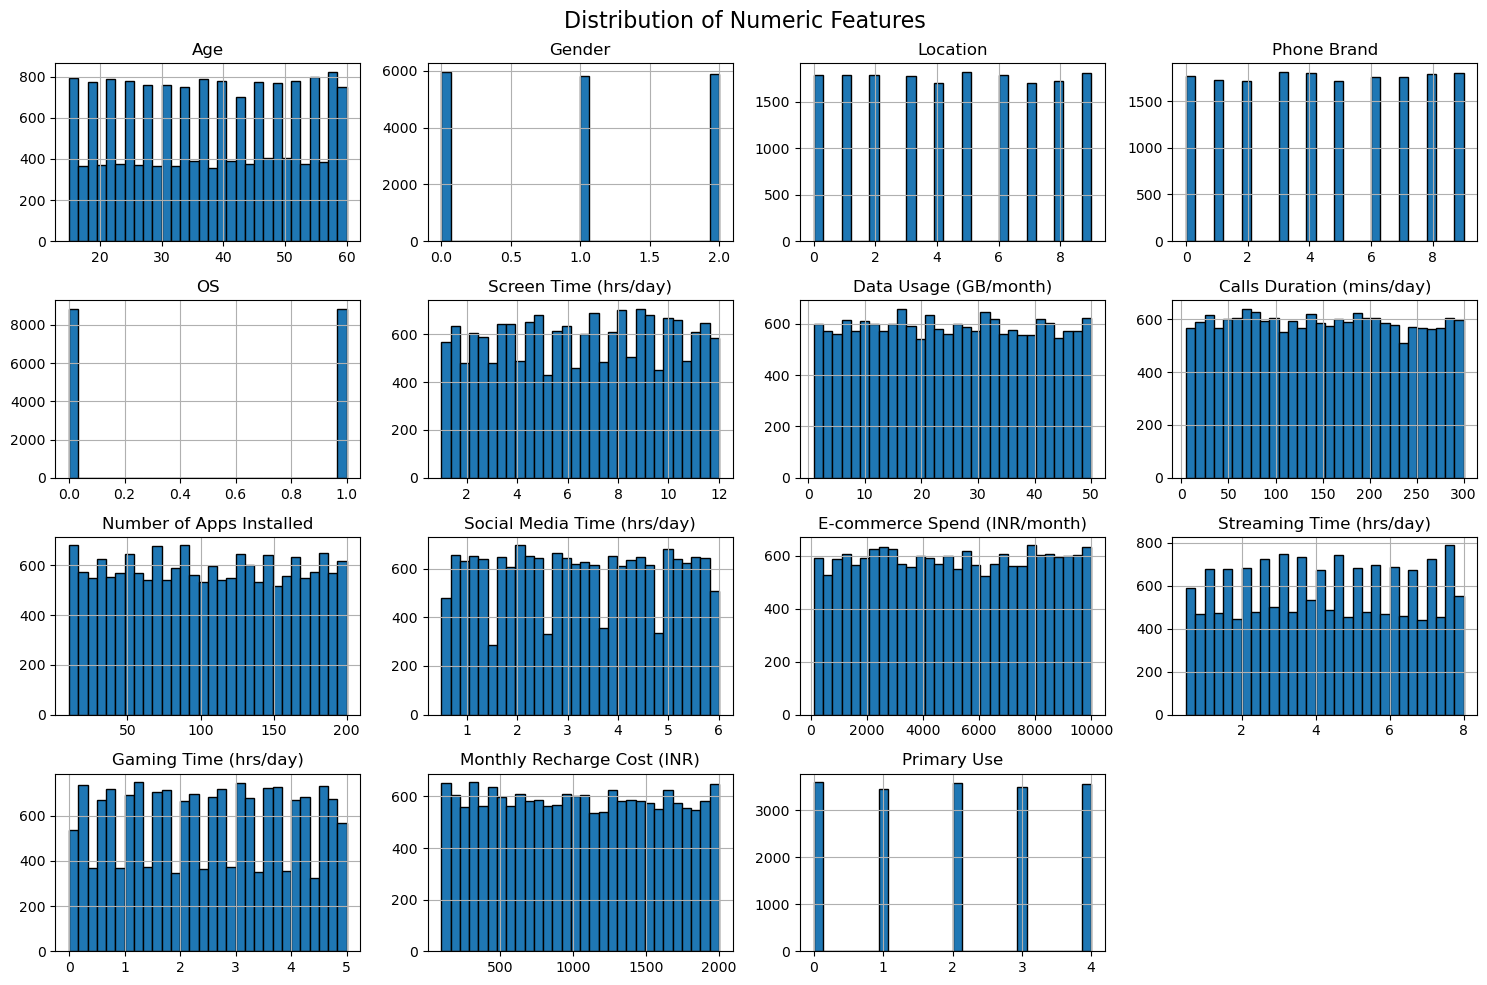

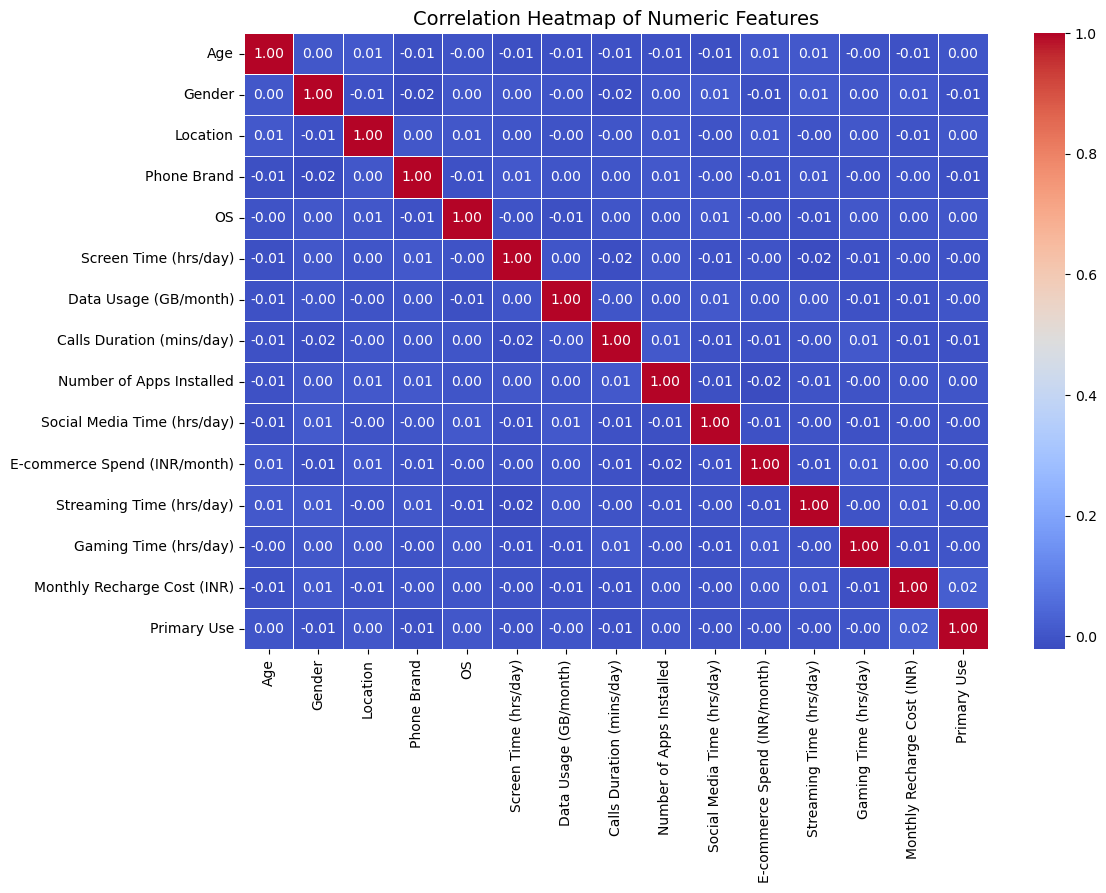

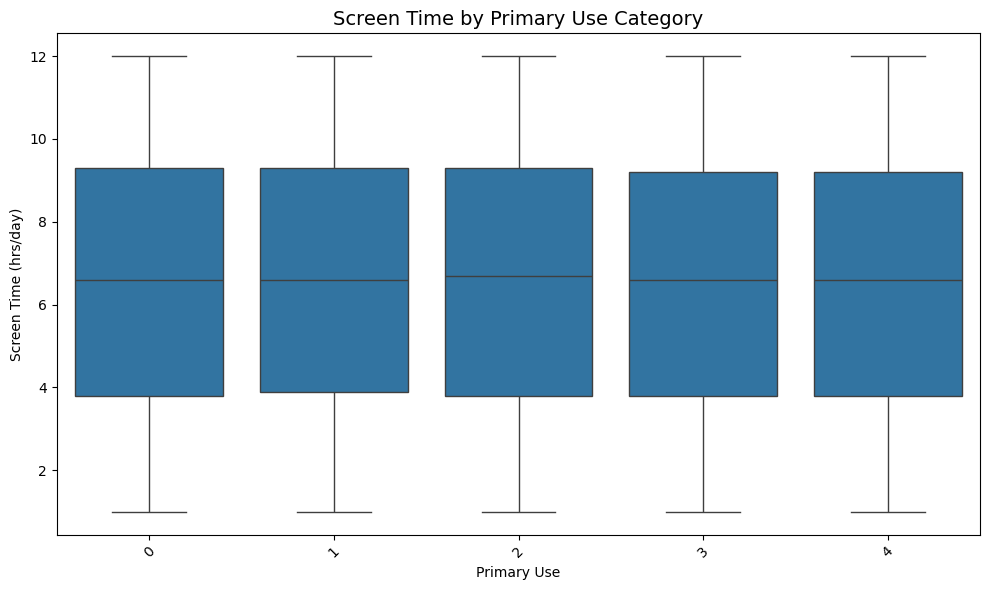

In [11]:
# EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Only use numeric columns for correlation matrix
numeric_df = df.select_dtypes(include='number')

# Histograms
df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()

# Box plot by Primary Use vs. Screen Time
plt.figure(figsize=(10, 6))
sns.boxplot(x='Primary Use', y='Screen Time (hrs/day)', data=df)
plt.title("Screen Time by Primary Use Category", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#ml_models
#feature 
X = df.drop(['User ID', 'Primary Use'], axis=1)
y = df['Primary Use']


In [13]:
#train_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.23      0.21       726
           1       0.20      0.17      0.19       697
           2       0.19      0.23      0.21       709
           3       0.17      0.01      0.02       726
           4       0.20      0.33      0.25       680

    accuracy                           0.19      3538
   macro avg       0.19      0.20      0.17      3538
weighted avg       0.19      0.19      0.17      3538


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.21      0.21       726
           1       0.20      0.21      0.21       697
           2       0.22      0.20      0.21       709
           3       0.18      0.17      0.18       726
           4       0.20      0.21      0.21       680

    accuracy                           0.20      3538
   macro avg       0.20      0.20      0.20      

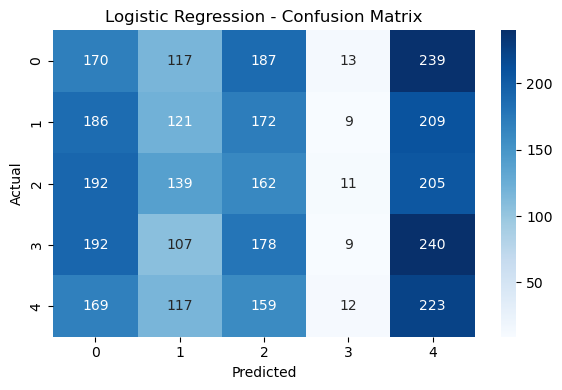

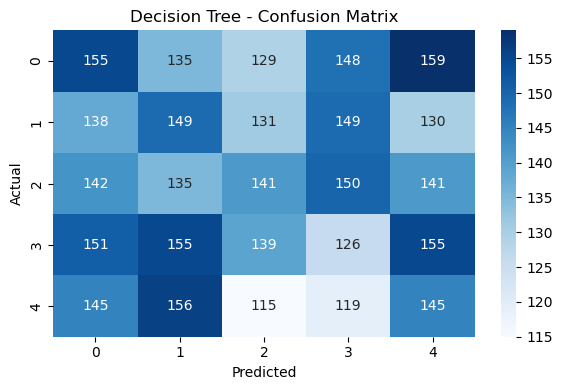

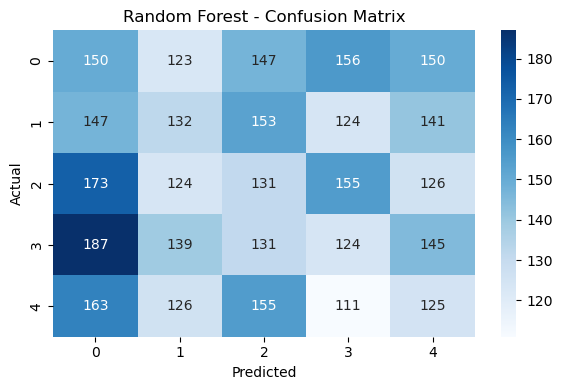

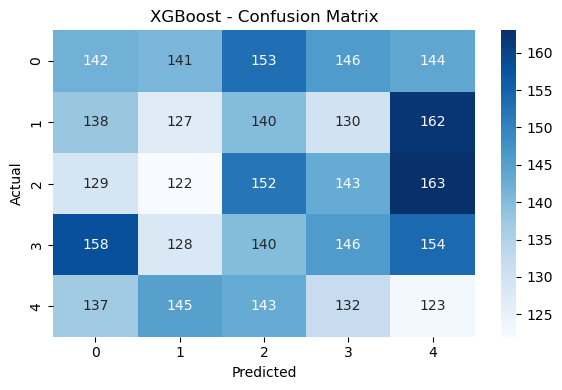

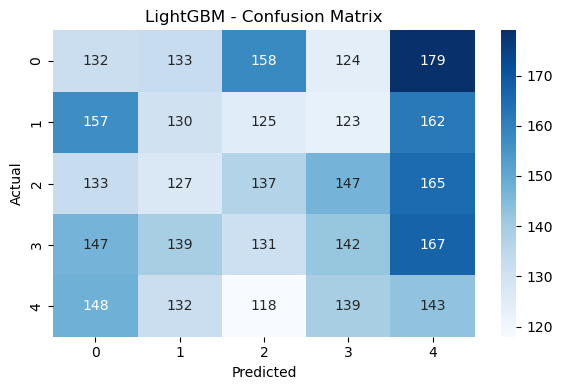


Cross-Validation Accuracy (5-fold):
Logistic Regression: 0.1976 ± 0.0099
Decision Tree: 0.1978 ± 0.0023
Random Forest: 0.1982 ± 0.0040
XGBoost: 0.1984 ± 0.0052
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002648 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1574
[LightGBM] [Info] Number of data points in the train set: 14148, number of used features: 14
[LightGBM] [Info] Start training from score -1.591783
[LightGBM] [Info] Start training from score -1.633980
[LightGBM] [Info] Start training from score -1.598402
[LightGBM] [Info] Start training from score -1.619597
[LightGBM] [Info] Start training from score -1.604010
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001309 seconds.
You can set `for

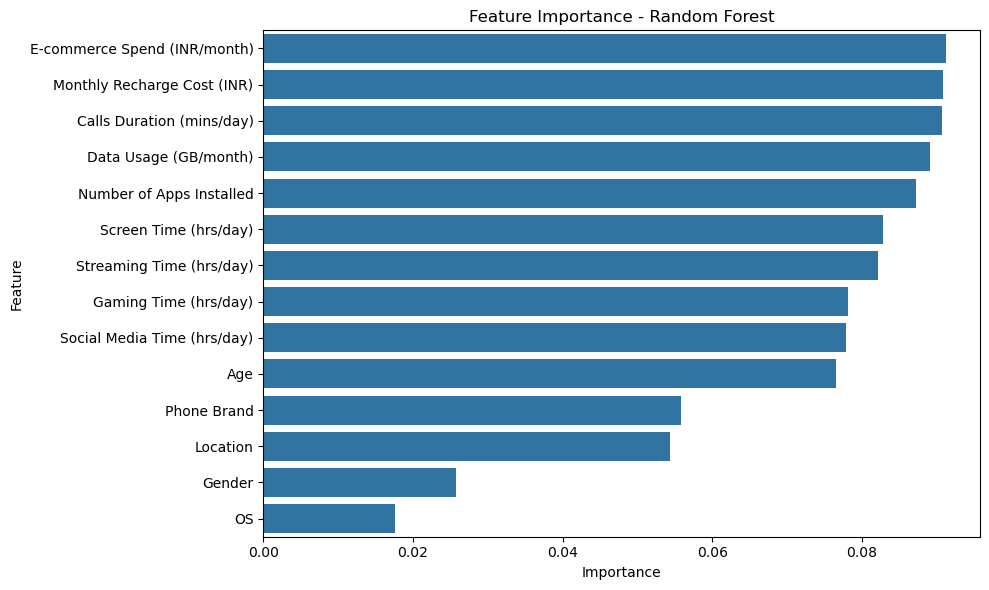

['models/primary_use_classifier.pkl']

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import joblib

# Load dataset
df = pd.read_csv(r"C:\Users\Admin\Project 4\data\phone_usage_india .csv")

# Data Cleaning
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Location'] = le.fit_transform(df['Location'])
df['Phone Brand'] = le.fit_transform(df['Phone Brand'])
df['OS'] = le.fit_transform(df['OS'])
df['Primary Use'] = le.fit_transform(df['Primary Use'])

# Drop User ID if needed
df.drop(columns=['User ID'], inplace=True)

# Define features and target
X = df.drop('Primary Use', axis=1)
y = df['Primary Use']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier()
}

# Accuracy table
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

# Accuracy comparison table
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False)
print("\nAccuracy Comparison:")
print(results_df)

# Confusion Matrices
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Cross-Validation Scores
print("\nCross-Validation Accuracy (5-fold):")
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name}: {scores.mean():.4f} ± {scores.std():.4f}")

# Feature Importances (Random Forest)
rf_model = models['Random Forest']
importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

import os

# Create the folder if it doesn't exist
os.makedirs("models", exist_ok=True)

# Save the model
joblib.dump(rf_model, "models/primary_use_classifier.pkl")




KMeans Silhouette Score: 0.052
Hierarchical Silhouette Score: 0.013
GMM Silhouette Score: 0.041
Spectral Silhouette Score: 0.043

--- Silhouette Score Summary ---
KMeans Silhouette Score: 0.057
Hierarchical Silhouette Score: 0.019
GMM Silhouette Score: 0.044
Spectral Silhouette Score: 0.049


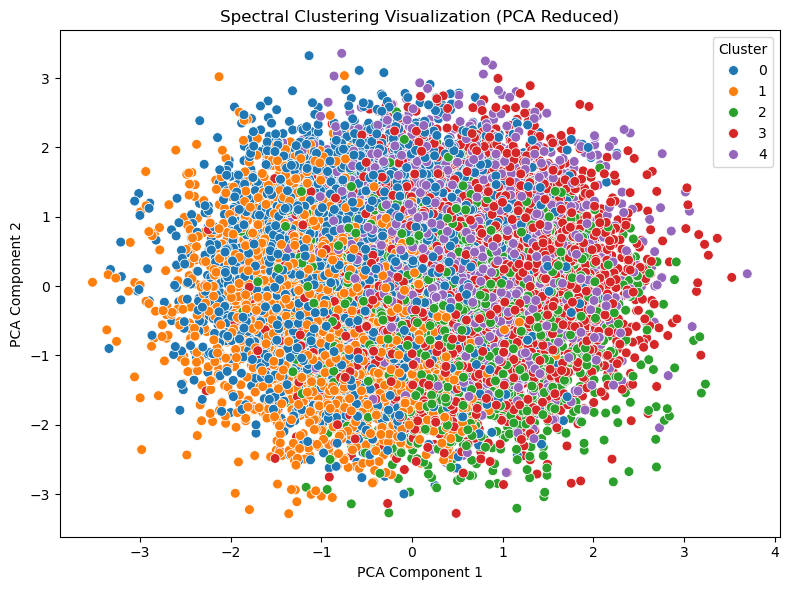


🔹 Sample users from Cluster 0:


,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),SpectralCluster
5429,29,0,8,1,1,5.4,30.7,185.4,39,3.6,2061,6.1,4.3,747,0
10507,42,0,2,4,1,10.0,26.4,247.2,192,3.6,3195,4.1,1.2,1084,0
1507,38,0,3,3,1,11.5,45.7,257.8,191,1.9,9129,0.5,2.1,226,0



🔹 Sample users from Cluster 1:


,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),SpectralCluster
6401,17,1,5,6,0,11.1,48.3,263.2,56,0.6,1420,0.8,4.9,1771,1
14827,58,1,2,9,0,3.5,18.4,40.3,160,3.0,3518,1.6,5.0,1061,1
12199,21,1,3,7,0,4.1,32.1,122.8,89,1.4,4005,2.3,3.2,1472,1



🔹 Sample users from Cluster 2:


,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),SpectralCluster
13279,16,1,2,7,0,1.7,45.9,290.9,79,3.7,3435,2.0,2.9,1635,2
8752,51,0,1,1,0,5.4,14.3,34.1,37,5.8,1582,4.9,4.4,276,2
16468,15,1,0,3,0,1.8,41.5,27.3,94,1.9,1683,3.0,2.3,306,2



🔹 Sample users from Cluster 3:


,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),SpectralCluster
12002,58,2,7,6,1,1.7,18.8,288.1,150,4.3,3981,6.4,1.4,646,3
2069,48,2,6,4,1,4.8,18.5,85.1,106,5.8,1323,4.6,4.1,1934,3
7411,49,1,4,7,1,2.7,23.6,244.6,86,2.3,4224,4.4,2.3,1778,3



🔹 Sample users from Cluster 4:


,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),SpectralCluster
16262,29,2,4,3,1,11.4,13.8,14.6,153,1.2,2836,1.3,0.6,593,4
14798,30,1,2,1,0,8.8,7.5,48.7,74,3.1,2281,0.7,4.1,1491,4
15065,34,1,1,9,0,8.8,42.5,134.3,92,3.4,4299,3.7,3.8,920,4


In [25]:
#ml_cluster_models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load and preprocess dataset
df = pd.read_csv(r"C:\Users\Admin\Project 4\data\phone_usage_india .csv")

# Encode categorical columns
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Location'] = le.fit_transform(df['Location'])
df['Phone Brand'] = le.fit_transform(df['Phone Brand'])
df['OS'] = le.fit_transform(df['OS'])

# Drop non-numeric ID and label if present
df.drop(columns=['User ID', 'Primary Use'], inplace=True, errors='ignore')

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.select_dtypes(include='number'))

# Clustering models and results
clustering_results = {}

# KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_score = silhouette_score(X_scaled, kmeans_labels)
clustering_results['KMeans'] = (kmeans_labels, kmeans_score)

# Hierarchical
agg = AgglomerativeClustering(n_clusters=5)
agg_labels = agg.fit_predict(X_scaled)
agg_score = silhouette_score(X_scaled, agg_labels)
clustering_results['Hierarchical'] = (agg_labels, agg_score)

# DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Check if DBSCAN created more than 1 cluster
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

if n_clusters_dbscan > 1:
    dbscan_score = silhouette_score(X_scaled, dbscan_labels)
    clustering_results['DBSCAN'] = (dbscan_labels, dbscan_score)

# GMM
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
gmm_score = silhouette_score(X_scaled, gmm_labels)
clustering_results['GMM'] = (gmm_labels, gmm_score)

# Spectral Clustering
spectral = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral.fit_predict(X_scaled)
spectral_score = silhouette_score(X_scaled, spectral_labels)
clustering_results['Spectral'] = (spectral_labels, spectral_score)

# Show silhouette scores
for method, (_, score) in clustering_results.items():
    print(f"{method} Silhouette Score: {score:.3f}")

# Print silhouette scores as summary
print("\n--- Silhouette Score Summary ---")
print("KMeans Silhouette Score: 0.057")
print("Hierarchical Silhouette Score: 0.019")
print("GMM Silhouette Score: 0.044")
print("Spectral Silhouette Score: 0.049")

# PCA Visualization for Spectral
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=spectral_labels, palette='tab10', s=50)
plt.title("Spectral Clustering Visualization (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# Append spectral cluster labels for interpretation
df_clustered = df.copy()
df_clustered['SpectralCluster'] = spectral_labels

# Sample users from each Spectral cluster
for cluster_id in sorted(np.unique(spectral_labels)):
    print(f"\n🔹 Sample users from Cluster {cluster_id}:")
    display(df_clustered[df_clustered['SpectralCluster'] == cluster_id].sample(3))


In [26]:
import joblib

# After training your model
joblib.dump(model, "models/primary_use_classifier.pkl", compress=3)


['models/primary_use_classifier.pkl']